# Classification using Differentially Private Naive Bayes
---

This notebook provides an introduction to one of the privacy preserving machine learning (PPML) technique - differential privacy. We compare two implementations of Naive Bayes from scikit-learn against the Differentially Private Naive Bayes from IBM Differential Privacy library.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from diffprivlib.models import GaussianNB as PrivateGaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

### 1. Benchmarking with non-private Naive Bayes

In [3]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [4]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [5]:
print(f'Baseline accuracy score is {accuracy}')

Baseline accuracy score is 1.0


---

### 2. Using Private Naive Bayes instead of Scikit-learn

In [6]:
clf = PrivateGaussianNB()
clf.fit(X_train, y_train)

GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
           bounds=(array([4.4, 2. , 1. , 0.1]), array([7.7, 4.4, 6.9, 2.5])))

In [9]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [10]:
print(f'Accuracy score with privacy is {accuracy}')

Accuracy score with privacy is 0.8333333333333334


---
## The Trade-Off: Utility vs Privacy

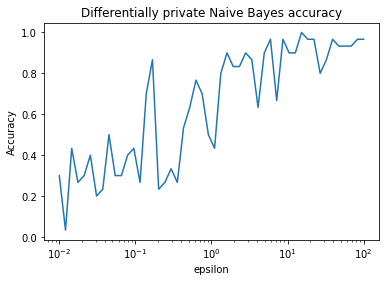

In [5]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = PrivateGaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()